In [34]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [35]:
# Defining Universe
tickers = {
    "Equities" : ['SPY', "QQQ", "IWM", "EFA"],
    "FX" : ["TLT=X", "IEF", "SHY"],
    "Commodities" : ["GLD", "USO", "DBA"],
    "FX" : ["FXE", "FXY", "FXB"]
}

In [92]:
# Download data
all_tickers = [t for tickers in tickers.values() for t in tickers]
data = yf.download(all_tickers, start="2020-01-01", auto_adjust=True)

if isinstance(data.columns, pd.MultiIndex):
    prices = data['Close']
else:
    prices = data[['Close']]
    prices.columns = all_tickers
print(prices.head())

# Calculate returns
returns = prices.pct_change().dropna()

# Make sure we only have tickers
assert all(col in all_tickers for col in returns.columns), "ERROR: Non-ticker columns found!"
assert 'Close' not in returns.columns, "ERROR: 'Close' still in columns!"
assert 'High' not in returns.columns, "ERROR: 'High' still in columns!"
assert 'Volume' not in returns.columns, "ERROR: 'Volume' still in columns!"

[*********************100%***********************]  10 of 10 completed

Ticker            DBA        EFA         FXB         FXE        FXY  \
Date                                                                  
2020-01-02  14.560221  58.637074  117.031303  100.962311  87.510002   
2020-01-03  14.392557  57.909767  116.415817  100.905067  87.919998   
2020-01-06  14.427855  58.135483  117.279320  101.162613  87.650002   
2020-01-07  14.463152  57.976639  116.856758  100.723846  87.510002   
2020-01-08  14.392557  58.143845  116.663864  100.428169  87.099998   

Ticker             GLD         IWM         QQQ         SPY         USO  
Date                                                                    
2020-01-02  143.949997  153.706039  208.580215  297.698944  102.480003  
2020-01-03  145.860001  153.103363  206.669647  295.444763  105.440002  
2020-01-06  147.389999  153.307343  208.001266  296.571899  105.279999  
2020-01-07  147.970001  152.797440  207.972305  295.737976  105.040001  
2020-01-08  146.860001  153.270264  209.535492  297.314240  101.

In [93]:
data

Price           Close                                                \
Ticker            DBA        EFA         FXB         FXE        FXY   
Date                                                                  
2020-01-02  14.560221  58.637074  117.031303  100.962311  87.510002   
2020-01-03  14.392557  57.909767  116.415817  100.905067  87.919998   
2020-01-06  14.427855  58.135483  117.279320  101.162613  87.650002   
2020-01-07  14.463152  57.976639  116.856758  100.723846  87.510002   
2020-01-08  14.392557  58.143845  116.663864  100.428169  87.099998   
...               ...        ...         ...         ...        ...   
2025-12-23  25.480000  96.290001  129.850006  108.769997  58.830002   
2025-12-24  25.650000  96.410004  129.839996  108.669998  58.980000   
2025-12-26  25.660000  96.570000  129.910004  108.690002  58.740002   
2025-12-29  25.650000  96.279999  129.979996  108.650002  58.490002   
2025-12-30  25.570000  96.440002  129.550003  108.400002  58.700001   

Price                                                                   ...  \
Ticker             GLD         IWM         QQQ         SPY         USO  ...   
Date                                                                    ...   
2020-01-02  143.949997  153.706039  208.580215  297.698944  102.480003  ...   
2020-01-03  145.860001  153.103363  206.669647  295.444763  105.440002  ...   
2020-01-06  147.389999  153.307343  208.001266  296.571899  105.279999  ...   
2020-01-07  147.970001  152.797440  207.972305  295.737976  105.040001  ...   
2020-01-08  146.860001  153.270264  209.535492  297.314240  101.279999  ...   
...                ...         ...         ...         ...         ...  ...   
2025-12-23  413.640015  252.080002  622.109985  687.960022   70.300003  ...   
2025-12-24  411.929993  252.710007  623.929993  690.380005   70.199997  ...   
2025-12-26  416.739990  251.419998  623.890015  690.309998   68.480003  ...   
2025-12-29  398.600006  249.880005  620.869995  687.849976   69.610001  ...   
2025-12-30  398.890015  248.029999  619.429993  687.010010   69.739998  ...   

Price       Volume                                                       \
Ticker         DBA       EFA    FXB     FXE     FXY       GLD       IWM   
Date                                                                      
2020-01-02  281300  24749300  36000  124300   92400   7733800  18297500   
2020-01-03  836700  29921500  10100   54300  118600  12272800  19295600   
2020-01-06  296000  22636400  39200   47000  126400  14403300  17150900   
2020-01-07  218500  15107500   9400   67500   69100   7978500  11817900   
2020-01-08  179400  14249500  47700   50200  258100  22248500  13832400   
...            ...       ...    ...     ...     ...       ...       ...   
2025-12-23  170800  16485700  21700   59700  141600  13193300  24973500   
2025-12-24  152900   5609700   5700   55900   70900   6718400  12103000   
2025-12-26  316400   9304200   4300   45600  164100  10476200  17429900   
2025-12-29  171800  16705400   3500   98100  384100  20679200  25218800   
2025-12-30  177100  15868700   2400   64300  264600  10137700  22097000   

Price                                    
Ticker           QQQ       SPY      USO  
Date                                     
2020-01-02  30969400  59151200  1563638  
2020-01-03  27518900  77709700  4325450  
2020-01-06  21655300  55653900  2598413  
2020-01-07  22139300  40496400  1742075  
2020-01-08  26397300  68296000  6918425  
...              ...       ...      ...  
2025-12-23  41120400  64840000  3517300  
2025-12-24  18468700  39445600  1596400  
2025-12-26  28959800  41613300  4224500  
2025-12-29  32458300  62559500  2758000  
2025-12-30  31073000  47078600  2322600  

[1507 rows x 50 columns]

In [94]:
# Rolling correlation with lookback windows
short_window = 30
long_window = 252 # 252 trading days in a year
rolling_corr = returns.rolling(window=short_window).corr()
historical_corr = returns.rolling(window=long_window).corr()

In [95]:
# current vs historical correlation heatmap
def plot_correlation_comparison(returns, short_window, long_window):
    current_corr = returns.tail(short_window).corr()
    historical_corr = returns.corr()
    diff_corr = current_corr - historical_corr
    fig, axes = plt.subplots(1,3, figsize=(20,6))

    # Plot 1: Current correlations
    sns.heatmap(current_corr, annot=True, fmt=".2f", cmap="RdYlGn", 
               center=0, vmin=-1, vmax=1, ax=axes[0], cbar_kws={"label" : "Correlation"})
    axes[0].set_title(f'Current Correlation (Last {short_window} Days)', fontsize=14, fontweight="bold")
    
    # Plot 2: Historical correlations
    sns.heatmap(historical_corr, annot=True, fmt='.2f', cmap='RdYlGn', 
                center=0, vmin=-1, vmax=1, ax=axes[1], cbar_kws={'label': 'Correlation'})
    axes[1].set_title('Historical Correlation (Full Period)', fontsize=14, fontweight='bold')
    
    # Plot 3: Difference (dislocations)
    sns.heatmap(diff_corr, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, vmin=-0.5, vmax=0.5, ax=axes[2], cbar_kws={'label': 'Difference'})
    axes[2].set_title('Dislocation (Current - Historical)', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    return current_corr, historical_corr, diff_corr

# 2. STATISTICAL ALERTS - FLAG REGIME BREAKS
def detect_dislocations(returns, short_window=30, long_window=252, threshold=2):
    """Identify correlation pairs that have broken from historical norms"""
    
    # Calculate rolling correlation for each pair
    all_pairs = []
    
    for i, ticker1 in enumerate(returns.columns):
        for ticker2 in returns.columns[i+1:]:
            # Rolling correlation
            rolling_corr = returns[ticker1].rolling(long_window).corr(returns[ticker2])
            
            # Historical mean and std
            hist_mean = rolling_corr.mean()
            hist_std = rolling_corr.std()
            
            # Current correlation
            current_corr = returns[ticker1].tail(short_window).corr(returns[ticker2])
            
            # Z-score
            z_score = (current_corr - hist_mean) / hist_std if hist_std != 0 else 0
            
            # Store results
            all_pairs.append({
                'Pair': f'{ticker1} vs {ticker2}',
                'Current': current_corr,
                'Historical Mean': hist_mean,
                'Historical Std': hist_std,
                'Z-Score': z_score,
                'Alert': 'YES' if abs(z_score) > threshold else 'NO',
                'Direction': 'STRONGER' if z_score > 0 else 'WEAKER'
            })
    
    df_alerts = pd.DataFrame(all_pairs)
    df_alerts = df_alerts.sort_values('Z-Score', key=abs, ascending=False)
    
    return df_alerts

In [96]:
# 3. TIME SERIES OF KEY CORRELATIONS
def plot_key_correlations(returns, pairs, window=60):
    """Plot how specific correlations evolve over time"""
    
    fig, axes = plt.subplots(len(pairs), 1, figsize=(14, 4*len(pairs)))
    if len(pairs) == 1:
        axes = [axes]
    
    for idx, (ticker1, ticker2) in enumerate(pairs):
        # Rolling correlation
        rolling_corr = returns[ticker1].rolling(window).corr(returns[ticker2])
        
        # Historical mean and std bands
        hist_mean = rolling_corr.mean()
        hist_std = rolling_corr.std()
        
        # Plot
        ax = axes[idx]
        ax.plot(rolling_corr.index, rolling_corr, label='Rolling Correlation', linewidth=2)
        ax.axhline(hist_mean, color='black', linestyle='--', label='Historical Mean', linewidth=1.5)
        ax.axhline(hist_mean + 2*hist_std, color='red', linestyle=':', label='±2σ', linewidth=1)
        ax.axhline(hist_mean - 2*hist_std, color='red', linestyle=':', linewidth=1)
        ax.fill_between(rolling_corr.index, hist_mean - hist_std, hist_mean + hist_std, 
                         alpha=0.2, color='gray', label='±1σ Band')
        
        ax.set_title(f'{ticker1} vs {ticker2} - Rolling {window}d Correlation', fontsize=12, fontweight='bold')
        ax.set_ylabel('Correlation')
        ax.legend(loc='best')
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

### Finding top correlation changes

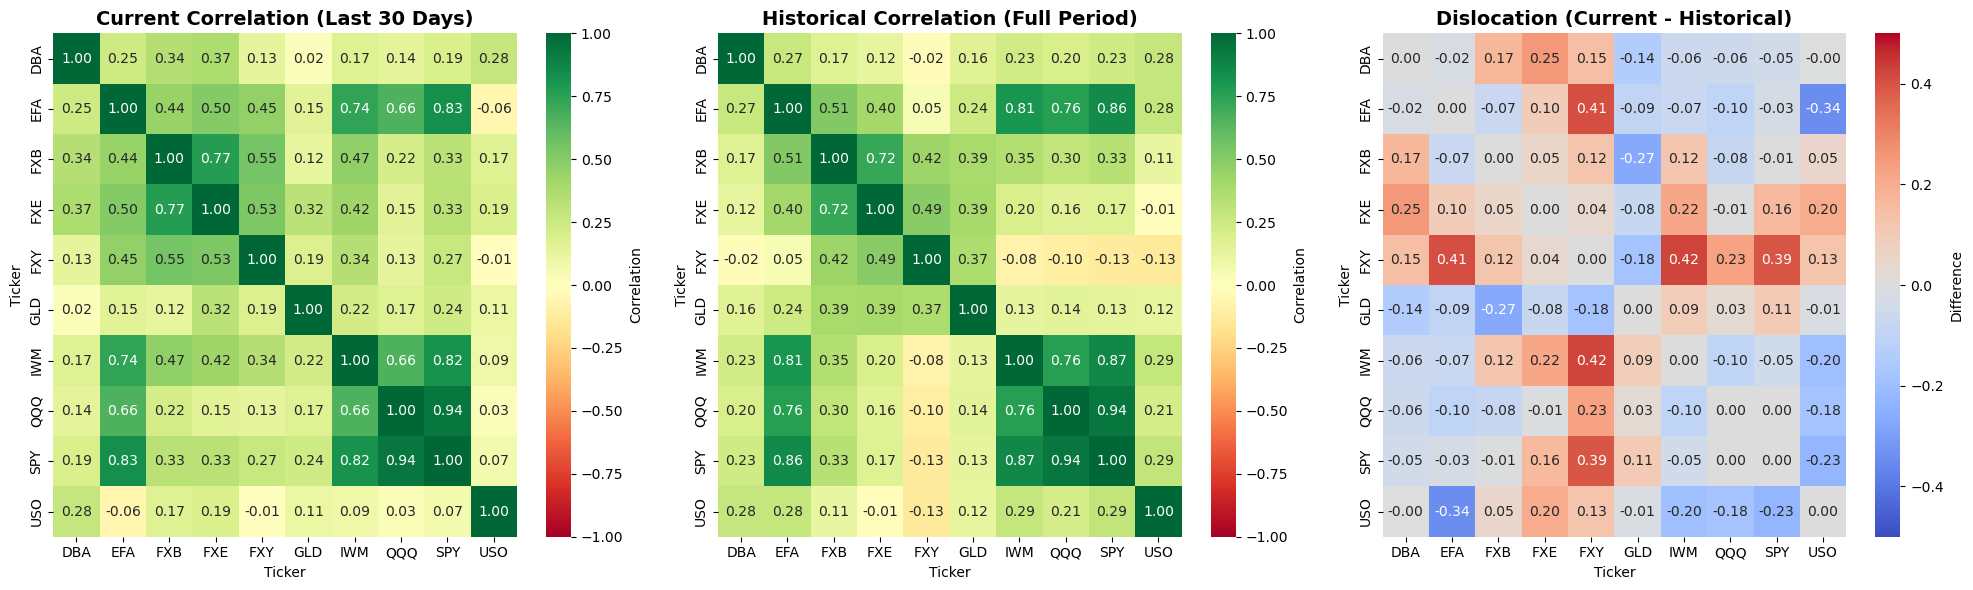


Top 10 Correlation Changes (by |Z-Score|):
      Pair   Current  Historical Mean  Historical Std   Z-Score Alert Direction
DBA vs FXE  0.367397         0.135826        0.079026  2.930297   YES  STRONGER
FXB vs GLD  0.118405         0.413316        0.102474 -2.877916   YES    WEAKER
EFA vs USO -0.061883         0.215808        0.119077 -2.332026   YES    WEAKER
FXY vs IWM  0.342272        -0.017950        0.176100  2.045555   YES  STRONGER
EFA vs FXY  0.453800         0.139972        0.163753  1.916471    NO  STRONGER
DBA vs GLD  0.019988         0.170098        0.082043 -1.829651    NO    WEAKER
FXY vs GLD  0.186704         0.419631        0.127845 -1.821944    NO    WEAKER
FXY vs SPY  0.268330        -0.044162        0.173954  1.796405    NO  STRONGER
DBA vs FXB  0.338611         0.170971        0.093926  1.784813    NO  STRONGER
FXB vs FXY  0.547014         0.407993        0.085008  1.635385    NO  STRONGER


In [97]:
# Generate visualizations
current_corr, historical_corr, diff_corr = plot_correlation_comparison(returns, short_window = 30, long_window = 252)

# Detect dislocations
df_alerts = detect_dislocations(returns)

# Show top dislocations
print("\nTop 10 Correlation Changes (by |Z-Score|):")
print(df_alerts.head(10).to_string(index=False))

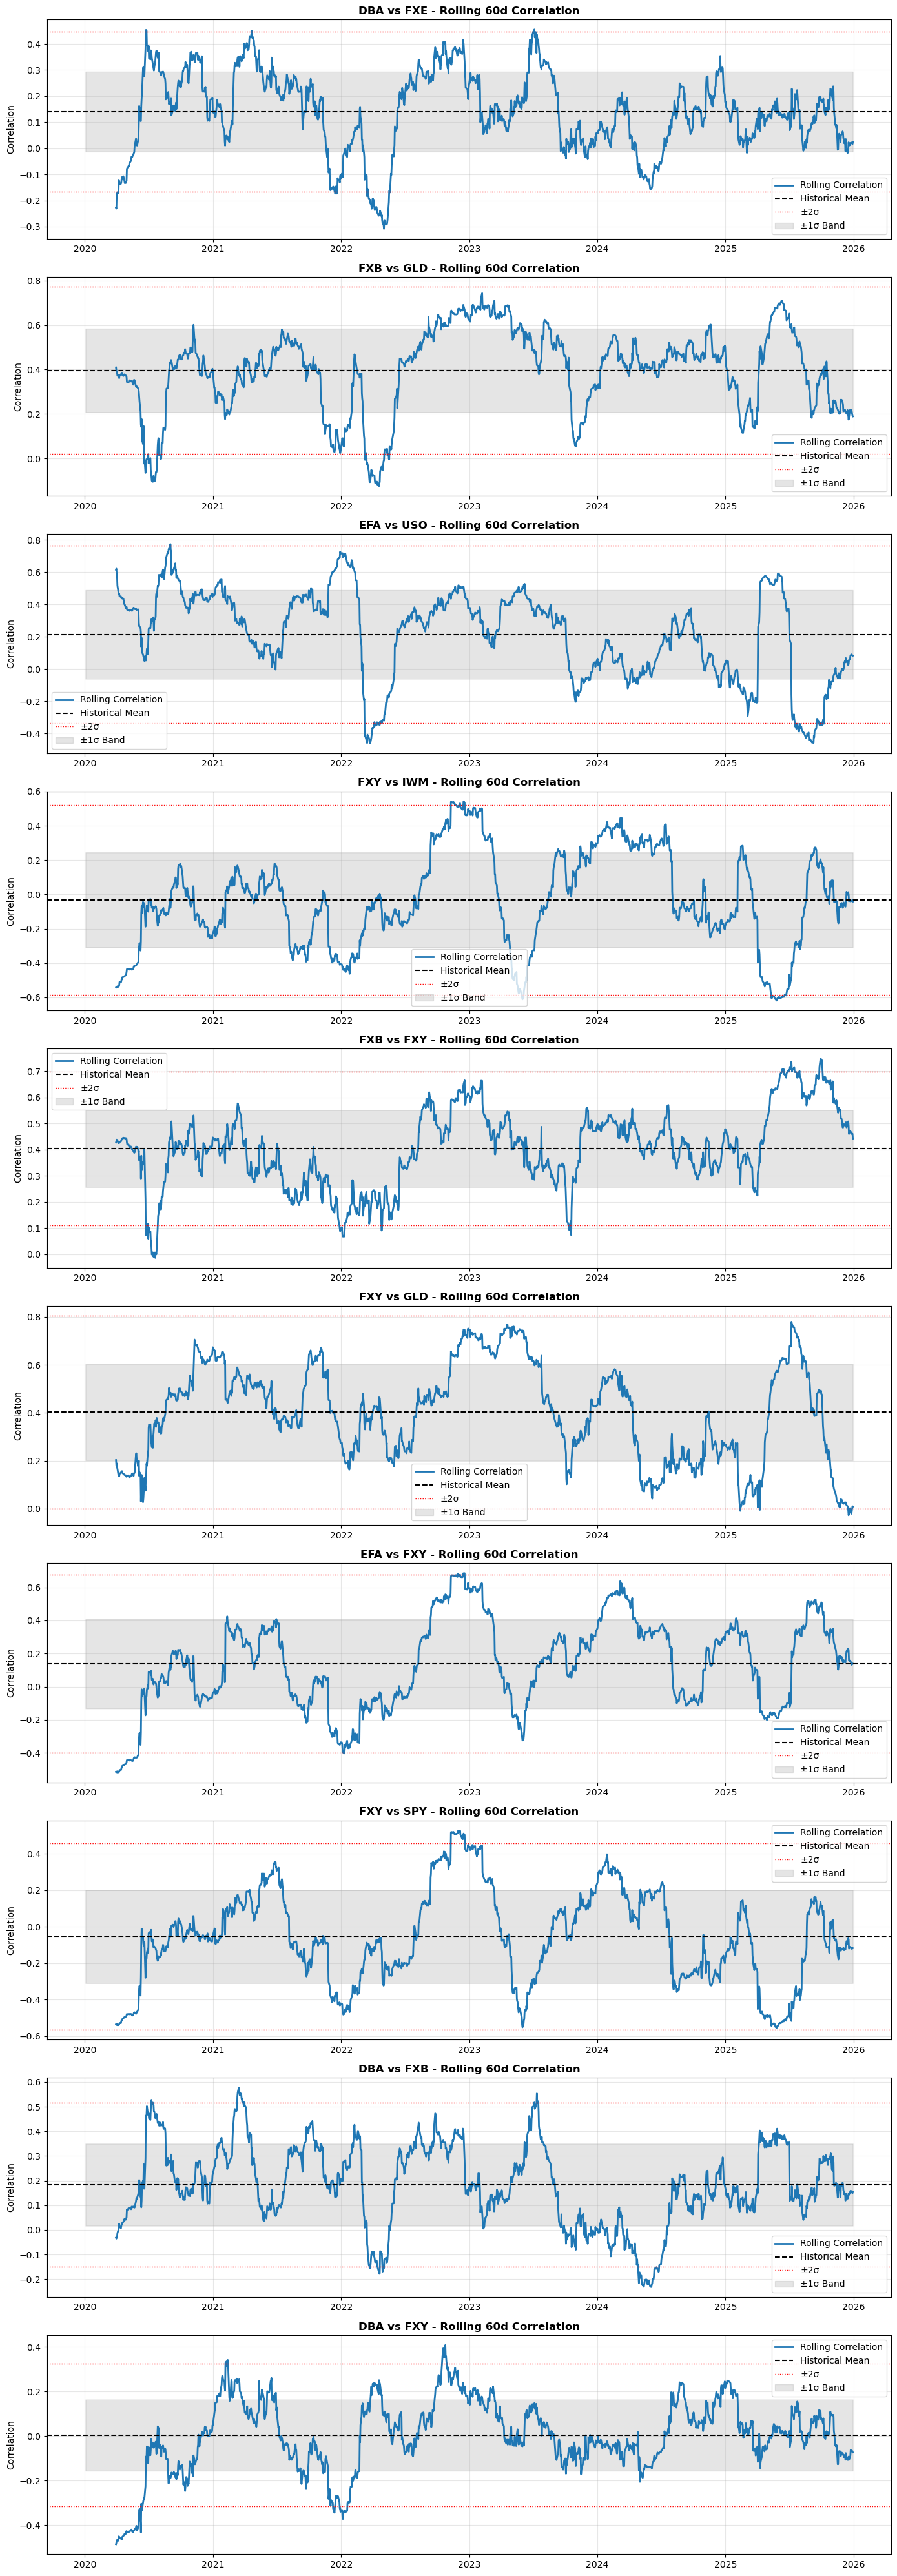

In [98]:
pairs = [("DBA", "FXE"), ("FXB", "GLD"), ("EFA", "USO"),
        ("FXY", "IWM"), ("FXB", "FXY"), ("FXY", "GLD"),
        ("EFA","FXY"), ("FXY", "SPY"), ("DBA", "FXB"), ("DBA", "FXY")
        ]
plot_key_correlations(returns, pairs, window=60)

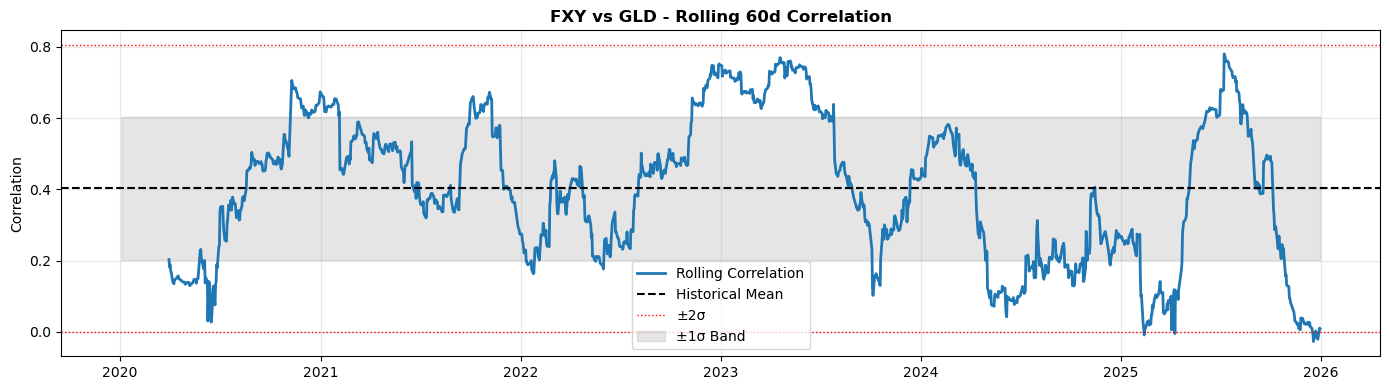

In [99]:
pairs = [("FXY", "GLD")]
plot_key_correlations(returns, pairs, window=60)

FXY (yen) and GLD (gold) usually move together because they’re both treated as safe-haven assets. Historically, Yen strength came from ultra-low rates which encouraged borrowing Yen cheaply to invest in higher-yeilding currencies. For gold, strength came from it being a historically safe asset, allowing investors to hedge against inflation. So, they often rose together in times of economic stress. 

This plot in shows how recently the correlation between FYX and GLD (Yen and Gold) is now beyond the 2σ bounds, meaning that the yen and gold are diverging. Put in macroeconomic context, Yen losing safe-haven status compared to gold. This could be due to a variety of reasons, including golds recent rally and the Bank of Japan's (BOJ) decision to raise interest rates. 

Therefore, investors should go long gold and avoid the yen. 